# Парсинг и сбор даных с сайта

Возьмём сайт https://docdoc.ru, на нём представлена информация о разных врачах.

Скачаем эту информацию, чтобы обучить модель предсказывать по регалиям врача стоимость приёма.

In [1]:
url = "https://docdoc.ru/search/page/1"

Для того, чтобы послать запрос можно воспользоваться библиотекой requests

http://docs.python-requests.org/en/master/

In [2]:
import requests

response = requests.get(url)

Получаем запрос по url-у

In [3]:
print(response)

<Response [200]>


In [4]:
print(type(response))

<class 'requests.models.Response'>


Посмотрим содержимое ответа

<!DOCTYPE html>
<!--[if lt IE 7]>     <html class="no-js lt-ie9 lt-ie8 lt-ie7 ie ie6" lang="ru"><![endif]-->
<!--[if IE 7]>        <html class="no-js lt-ie9 lt-ie8 ie ie7" lang="ru"><![endif]-->
<!--[if IE 8]>        <html class="no-js lt-ie9 ie ie8" lang="ru"><![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="ru"><!--<![endif]-->
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"UwQHUFJTGwIFV1FaAgQH"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(15),s={};try{o=localStorage.getItem("__nr_flags").split("
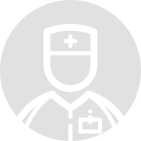
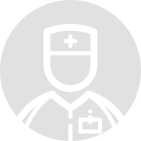
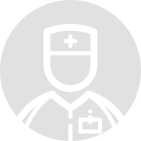
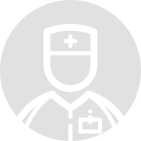
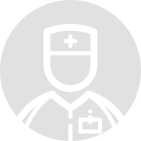
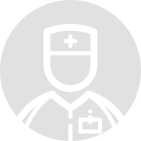
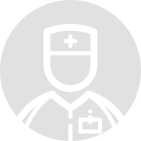
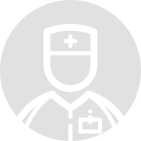
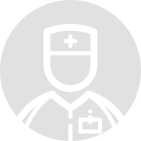
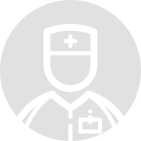

In [5]:
print(response.text)

Видим страницу в формате HTML

Подробнее про HTML можно почитать здесь: http://htmlbook.ru/

Парсить это вручную было бы очень сложно, есть специальная библиотека для парсинга HTML страниц

In [6]:
from bs4 import BeautifulSoup

Создаём вспомогательный объект для парсинга

In [7]:
bs4_object = BeautifulSoup(response.text, "html5lib")

<!DOCTYPE html>
<!--[if lt IE 7]>     <html class="no-js lt-ie9 lt-ie8 lt-ie7 ie ie6" lang="ru"><![endif]--><!--[if IE 7]>        <html class="no-js lt-ie9 lt-ie8 ie ie7" lang="ru"><![endif]--><!--[if IE 8]>        <html class="no-js lt-ie9 ie ie8" lang="ru"><![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="ru"><!--<![endif]--><head>
    <meta charset="utf-8"/>
    <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"UwQHUFJTGwIFV1FaAgQH"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(15),s={};try{o=localStorage.getItem("__nr_flags").split(","
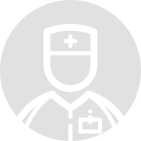
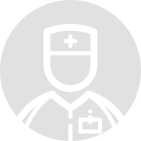
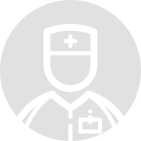
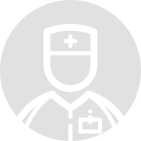
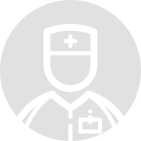
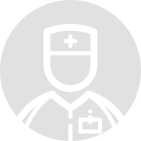
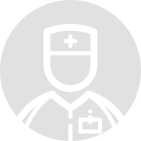
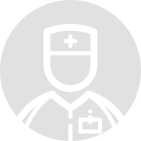
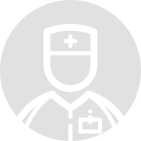
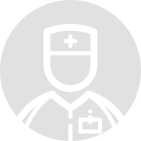

In [8]:
bs4_object

In [9]:
bs4_object.text

'\n    \n    (window.NREUM||(NREUM={})).loader_config={xpid:"UwQHUFJTGwIFV1FaAgQH"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(15),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("internal-error",function(t){r(t.stack)}),s.dev&&i.on("fn-err",function(t,n,e){r(e.stack)}),s.dev&&(r("NR AGENT IN DEVELOPMENT MODE"),r("flags: "+a(s,function(t,n){return t}).join(", ")))},{}],2:[function(t,n,e){function r(t,n,e,r,s){try{p?p-=1:o(s||new UncaughtException(t,n,e),!0)}catch(f){try{i("ierr"

Можем использовать разные системы поиска данных (по тегу, по классу и т.д.)

In [10]:
bs4_object.find_all("div", attrs={"class": "doc__info"})

[<div class="doc__info">
 					<a class="doc__name" data-event-tracker="1" data-tracker-action="doctor" data-tracker-event="click" data-tracker-label="name" href="/doctor/Sergeyko_Anatoliy">
 						Сергейко						<br/>
 						Анатолий Анатольевич					</a>
 					<div class="doc__prof">Хирург, Эндоскопист<br/>
 													Cтаж 23 года							/ Врач первой категории, <abbr class="js-tooltip" title="Кандидат медицинских наук">к.м.н.</abbr><br/>											</div>
 
 					
 <div class="doc__price">
 	Приём от
 
 	
 	<span class="doc__price-value doc__price-tooltip js-tooltip-custom">
 					1700 руб.			</span>
 
 	
 
 	<div class="hidden js-tooltip-html">
 		<div class="doc__tooltip">
 			<div class="doc__tooltip-table">
 				
 <div class="doc__tooltip-line doctor-card__price-tooltip-note">
 	<div class="doc__tooltip-cell">Хирург, Эндоскопист</div>
 	<div class="doc__tooltip-cell">ул. Александра Солженицына, д. 5, стр.1</div>
 
 	<div class="doc__tooltip-cell">
 					1700 руб.
 			</div>
 
 </

In [11]:
first_obj = bs4_object.find_all("div", attrs={"class": "doc__info"})[0]

In [12]:
type(first_obj)

bs4.element.Tag

Постепенно, при помощи разных поисков найдём нужные данные

In [13]:
first_obj.find("div", attrs={"class": "doc__prof"}).text

'Хирург, Эндоскопист\n\t\t\t\t\t\t\t\t\t\t\t\t\tCтаж 23 года\t\t\t\t\t\t\t/ Врач первой категории, к.м.н.\t\t\t\t\t\t\t\t\t\t\t'

In [14]:
import re

In [15]:
text = first_obj.find("div", attrs={"class": "doc__prof"}).text
text

'Хирург, Эндоскопист\n\t\t\t\t\t\t\t\t\t\t\t\t\tCтаж 23 года\t\t\t\t\t\t\t/ Врач первой категории, к.м.н.\t\t\t\t\t\t\t\t\t\t\t'

In [16]:
parts = [p.strip() for p in text.split('\t') if p != '']
parts

['Хирург, Эндоскопист', 'Cтаж 23 года', '/ Врач первой категории, к.м.н.']

In [17]:
parts

['Хирург, Эндоскопист', 'Cтаж 23 года', '/ Врач первой категории, к.м.н.']

In [18]:
proffesions = [s.strip() for s in parts[0].split(',')]
proffesions

['Хирург', 'Эндоскопист']

In [19]:
print(re.findall('Стаж', parts[1]))
print(re.findall('Cтаж', parts[1]))

[]
['Cтаж']


Cтоп, что???

In [20]:
bytes('Стаж', 'utf-8')

b'\xd0\xa1\xd1\x82\xd0\xb0\xd0\xb6'

In [21]:
bytes('Cтаж', 'utf-8')

b'C\xd1\x82\xd0\xb0\xd0\xb6'

В слове "Стаж" на сайте английская буква С

In [22]:
experience = float(re.findall('Cтаж (\d+)', parts[1])[0])
experience

23.0

In [23]:
is_first_category = 'Врач первой категории' in text
is_first_category

True

In [24]:
is_phd = 'к.м.н.' in text
is_phd

True

In [25]:
price = float(re.findall('\d+', first_obj.find(attrs={'class': 'doc__price-value'}).text)[0])
price

1700.0

In [26]:
name_parts = [p for p in re.split('[\t\n ]', first_obj.find(attrs={'class': 'doc__name'}).text) if p != '']
name_parts

['Сергейко', 'Анатолий', 'Анатольевич']

Напишем итоговую функцию, извлекающую информацию

In [27]:
def extract_info(obj):
    prof_text = obj.find("div", attrs={"class": "doc__prof"}).text
    prof_parts = [p.strip() for p in prof_text.split('\t') if p != '']
    
    proffesions = [s.strip() for s in prof_parts[0].split(',')]
    experience_raws = re.findall('Cтаж (\d+)', prof_text)
    if len(experience_raws) > 0:
        experience = float(experience_raws[0])
    else:
        experience = None
    
    is_first_category = 'Врач первой категории' in prof_text
    is_phd = 'к.м.н.' in prof_text
    
    name_parts = [p for p in re.split('[\t\n ]', obj.find(attrs={'class': 'doc__name'}).text) if p != '']
    price_raws = re.findall('\d+', obj.find(attrs={'class': 'doc__price-value'}).text)
    if len(price_raws) > 0:
        price = float(price_raws[0])
    else:
        price = None
    
    return {
        'proffesions': proffesions,
        'experience': experience,
        'is_first_category': is_first_category,
        'is_phd': is_phd,
        'name_parts': name_parts,
        'price': price
    }


Проверим её работу на скаченной странице

In [28]:
for x in bs4_object.find_all("div", attrs={"class": "doc__info"}):
    print(extract_info(x))

{'proffesions': ['Хирург', 'Эндоскопист'], 'price': 1700.0, 'is_phd': True, 'experience': 23.0, 'is_first_category': True, 'name_parts': ['Сергейко', 'Анатолий', 'Анатольевич']}
{'proffesions': ['Кардиолог', 'Терапевт', 'Врач функциональной диагностики'], 'price': 1700.0, 'is_phd': True, 'experience': 19.0, 'is_first_category': False, 'name_parts': ['Сюмакова', 'Светлана', 'Александровна']}
{'proffesions': ['Лор (отоларинголог)'], 'price': 2450.0, 'is_phd': True, 'experience': 35.0, 'is_first_category': False, 'name_parts': ['Сергеева', 'Алла', 'Петровна']}
{'proffesions': ['Флеболог', 'Хирург', 'Сосудистый хирург'], 'price': 2079.0, 'is_phd': True, 'experience': 28.0, 'is_first_category': False, 'name_parts': ['Бисеков', 'Саламат', 'Хамитович']}
{'proffesions': ['Уролог', 'Хирург', 'Проктолог', 'УЗИ-специалист'], 'price': 1300.0, 'is_phd': False, 'experience': 23.0, 'is_first_category': False, 'name_parts': ['Марков', 'Сергей', 'Валерьевич']}
{'proffesions': ['Дерматолог', 'Косметолог

Для каждой страницы с докторами сделаем запрос, будем повторять, пока не получим плохой ответ

In [29]:
%%time
page_num = 0
doctors = []

while True:
    page_num += 1 
    print ('page_num {}'.format(page_num))
    url = "https://docdoc.ru/search/page/{}".format(page_num)
    response = requests.get(url)
    if response.status_code != 200:
        break
    bs4_object = BeautifulSoup(response.text, "html5lib")
    for d in bs4_object.find_all("div", attrs={"class": "doc__info"}):
        doctors.append(extract_info(d))

page_num 1
page_num 2
page_num 3
page_num 4
page_num 5
page_num 6
page_num 7
page_num 8
page_num 9
page_num 10
page_num 11
page_num 12
page_num 13
page_num 14
page_num 15
page_num 16
page_num 17
page_num 18
page_num 19
page_num 20
page_num 21
page_num 22
page_num 23
page_num 24
page_num 25
page_num 26
page_num 27
page_num 28
page_num 29
page_num 30
page_num 31
page_num 32
page_num 33
page_num 34
page_num 35
page_num 36
page_num 37
page_num 38
page_num 39
page_num 40
page_num 41
page_num 42
page_num 43
page_num 44
page_num 45
page_num 46
page_num 47
page_num 48
page_num 49
page_num 50
page_num 51
page_num 52
page_num 53
page_num 54
page_num 55
page_num 56
page_num 57
page_num 58
page_num 59
page_num 60
page_num 61
page_num 62
page_num 63
page_num 64
page_num 65
page_num 66
page_num 67
page_num 68
page_num 69
page_num 70
page_num 71
page_num 72
page_num 73
page_num 74
page_num 75
page_num 76
page_num 77
page_num 78
page_num 79
page_num 80
page_num 81
page_num 82
page_num 83
page_num 84
p

Cохраним данные на диск в формате JSON

In [30]:
import json

with open('doctors.json', 'w') as f:
    json.dump(doctors, f)

Есть более гиибкая библиотека scrapy, позволяющая более эффективно парсить сайте и имеющая встроенные дополнительные улучшения (задержка между запросами, логгирования, асинхронные запросы) для более гибкой настройки.

Если нужно собирать данные в промышленных мастабах, то лучше пользоваться scrapy, если задача небольшая, то проще использовать requests + BeautifulSoup.

Документация scrapy: https://docs.scrapy.org/en/latest/

In [31]:
import scrapy

class DoctorsSpider(scrapy.Spider):
    name = 'doctors'
    
    def __init__(self):
        self.domain = 'https://docdoc.ru' # нужно указать на какой домен будут запросы
        self.download_delay = 3. # задержка между запросами
        
    def start_requests(self):
        for page in range(1, 51): # сделаем запросы только на 50 страниц
            yield scrapy.Request("https://docdoc.ru/search/page/{}".format(page))
            
    def parse(self, response):
        # вообще у scrapy есть свой парсинг с поиском, но для простоты (и чтобы меньше кода менять) можно и так
        bs4_object = BeautifulSoup(response.body, "html5lib")
        for x in bs4_object.find_all("div", attrs={"class": "doc__info"}):
            yield extract_info(x)
        

In [32]:
%%time
from scrapy.crawler import CrawlerRunner
from twisted.internet import reactor
from scrapy.utils.log import configure_logging

configure_logging()
runner = CrawlerRunner({'FEED_FORMAT': 'json', 'FEED_URI': 'doctors_scrapy.json', 'LOG_LEVEL': 'INFO'})
d = runner.crawl(DoctorsSpider)
d.addBoth(lambda _: reactor.stop())
reactor.run()

2018-02-05 22:18:39 [scrapy.crawler] INFO: Overridden settings: {'LOG_LEVEL': 'INFO', 'FEED_URI': 'doctors_scrapy.json', 'FEED_FORMAT': 'json'}
2018-02-05 22:18:39 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.logstats.LogStats',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.corestats.CoreStats']
2018-02-05 22:18:39 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.HttpCompressionMiddleware',
 'scrapy.downloadermiddlewares.r

CPU times: user 17.9 s, sys: 88 ms, total: 18 s
Wall time: 2min 53s
